In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
dir = '/content/drive/MyDrive/Data Challenge/Dataset/'

In [ ]:
population = pd.read_excel(dir + 'population.xlsx')
death = pd.read_excel(dir+ 'death.xlsx')
birth = pd.read_excel(dir + 'birth.xlsx')
migration = pd.read_excel(dir + 'migration.xlsx')

In [ ]:
cities = population['City']

cities_to_remove = ['Абай', 'Жетісу' , 'Ұлытау']

# Use np.isin() to filter out the cities to remove
cities = cities[~np.isin(cities, cities_to_remove)]
print(cities)

0      Республика Казахстан 
2                Акмолинская
3                Актюбинская
4                Алматинская
5                 Атырауская
6      Западно-Казахстанская
7                 Жамбылская
9             Карагандинская
10              Костанайская
11            Кызылординская
12             Мангистауская
13              Павлодарская
14      Северо-Казахстанская
15            Туркестанская*
17    Восточно-Казахстанская
18                 г. Астана
19                 г. Алматы
20                г. Шымкент
Name: City, dtype: object


In [ ]:
population = population.drop(columns=['City'])
death = death.drop(columns=['City'])
birth= birth.drop(columns=['City'])
migration = migration.drop(columns=['City'])

In [ ]:
# Refine the data cleaning function to handle numbers with spaces and convert them to integers
def clean_numeric(data):
    # Remove any spaces and replace missing or placeholder values ("-") with 0, then convert to integer
    return data.apply(lambda x: x.astype(str).str.replace(" ", "").str.replace("-", "0").str.replace(",", "").astype(int))

population = clean_numeric(population)
death = clean_numeric(death)
birth = clean_numeric(birth)
migration = clean_numeric(migration)

population['City'] = cities
birth['City'] = cities
death['City'] = cities
migration['City'] = cities

In [ ]:
# Prepare a dictionary to store projections for each city
np.random.seed(42)
years = [2025, 2026, 2027, 2028, 2029]

# Create an empty DataFrame to store the new projections
new_populations = pd.DataFrame(columns=['City', 2025, 2026, 2027, 2028, 2029])
new_populations['City'] = cities
new_populations

,City,2025,2026,2027,2028,2029
0,Республика Казахстан,NaN,NaN,NaN,NaN,NaN
2,Акмолинская,NaN,NaN,NaN,NaN,NaN
3,Актюбинская,NaN,NaN,NaN,NaN,NaN
4,Алматинская,NaN,NaN,NaN,NaN,NaN
5,Атырауская,NaN,NaN,NaN,NaN,NaN
6,Западно-Казахстанская,NaN,NaN,NaN,NaN,NaN
7,Жамбылская,NaN,NaN,NaN,NaN,NaN
9,Карагандинская,NaN,NaN,NaN,NaN,NaN
10,Костанайская,NaN,NaN,NaN,NaN,NaN
11,Кызылординская,NaN,NaN,NaN,NaN,NaN


In [ ]:
for city in cities:
    # Extract data for the current city
    population_city = population[population['City'] == city].iloc[:, 1:-1].values.flatten()
    birth_city = birth[birth['City'] == city].iloc[:, 1:-1].values.flatten()
    death_city = death[death['City'] == city].iloc[:, 1:-1].values.flatten()
    migration_city = migration[migration['City'] == city].iloc[:, 1:-1].values.flatten()

    # Calculate the average annual growth rate
    annual_growth = (birth_city - death_city + migration_city) / population_city[:-1]
    avg_growth_rate = annual_growth.mean()

    # Start the projection with the last known population value
    population_projection = [population_city[-1]]

    # Project the population for the next five years
    for year in years:
        noise = np.random.uniform(-0.005, 0.005)  # Add noise for smoothing
        adjusted_growth_rate = avg_growth_rate + noise
        next_population = round(population_projection[-1] * (1 + adjusted_growth_rate))
        population_projection.append(next_population)
        new_populations.loc[(new_populations['City'] == city), year] = next_population

new_populations

,City,2025,2026,2027,2028,2029
0,Республика Казахстан,20299343,20685323,21033399,21359287,21595679
2,Акмолинская,793610,798507,809887,819282,829663
3,Актюбинская,951642,973073,993649,1008498,1023261
4,Алматинская,1558083,1587355,1620678,1653196,1684040
5,Атырауская,720924,734772,750008,766116,783258
6,Западно-Казахстанская,704436,711667,721211,731447,737834
7,Жамбылская,1256055,1284944,1313142,1353565,1395459
9,Карагандинская,1151163,1161395,1169315,1184148,1196279
10,Костанайская,832248,837624,839175,848071,851544
11,Кызылординская,865883,887481,911466,936342,958509


In [ ]:
new_populations

,City,2025,2026,2027,2028,2029
0,Республика Казахстан,20299343,20685323,21033399,21359287,21595679
2,Акмолинская,793610,798507,809887,819282,829663
3,Актюбинская,951642,973073,993649,1008498,1023261
4,Алматинская,1558083,1587355,1620678,1653196,1684040
5,Атырауская,720924,734772,750008,766116,783258
6,Западно-Казахстанская,704436,711667,721211,731447,737834
7,Жамбылская,1256055,1284944,1313142,1353565,1395459
9,Карагандинская,1151163,1161395,1169315,1184148,1196279
10,Костанайская,832248,837624,839175,848071,851544
11,Кызылординская,865883,887481,911466,936342,958509


In [ ]:
population['City'] = cities
all_population = pd.DataFrame()
all_population['City'] = cities
all_population = pd.merge(population, new_populations, on=['City'], how='outer', suffixes=('_past', '_new'))

all_population = all_population.iloc[:-3]

all_population = all_population[['City', 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029]]

all_population

all_population.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_population.csv')

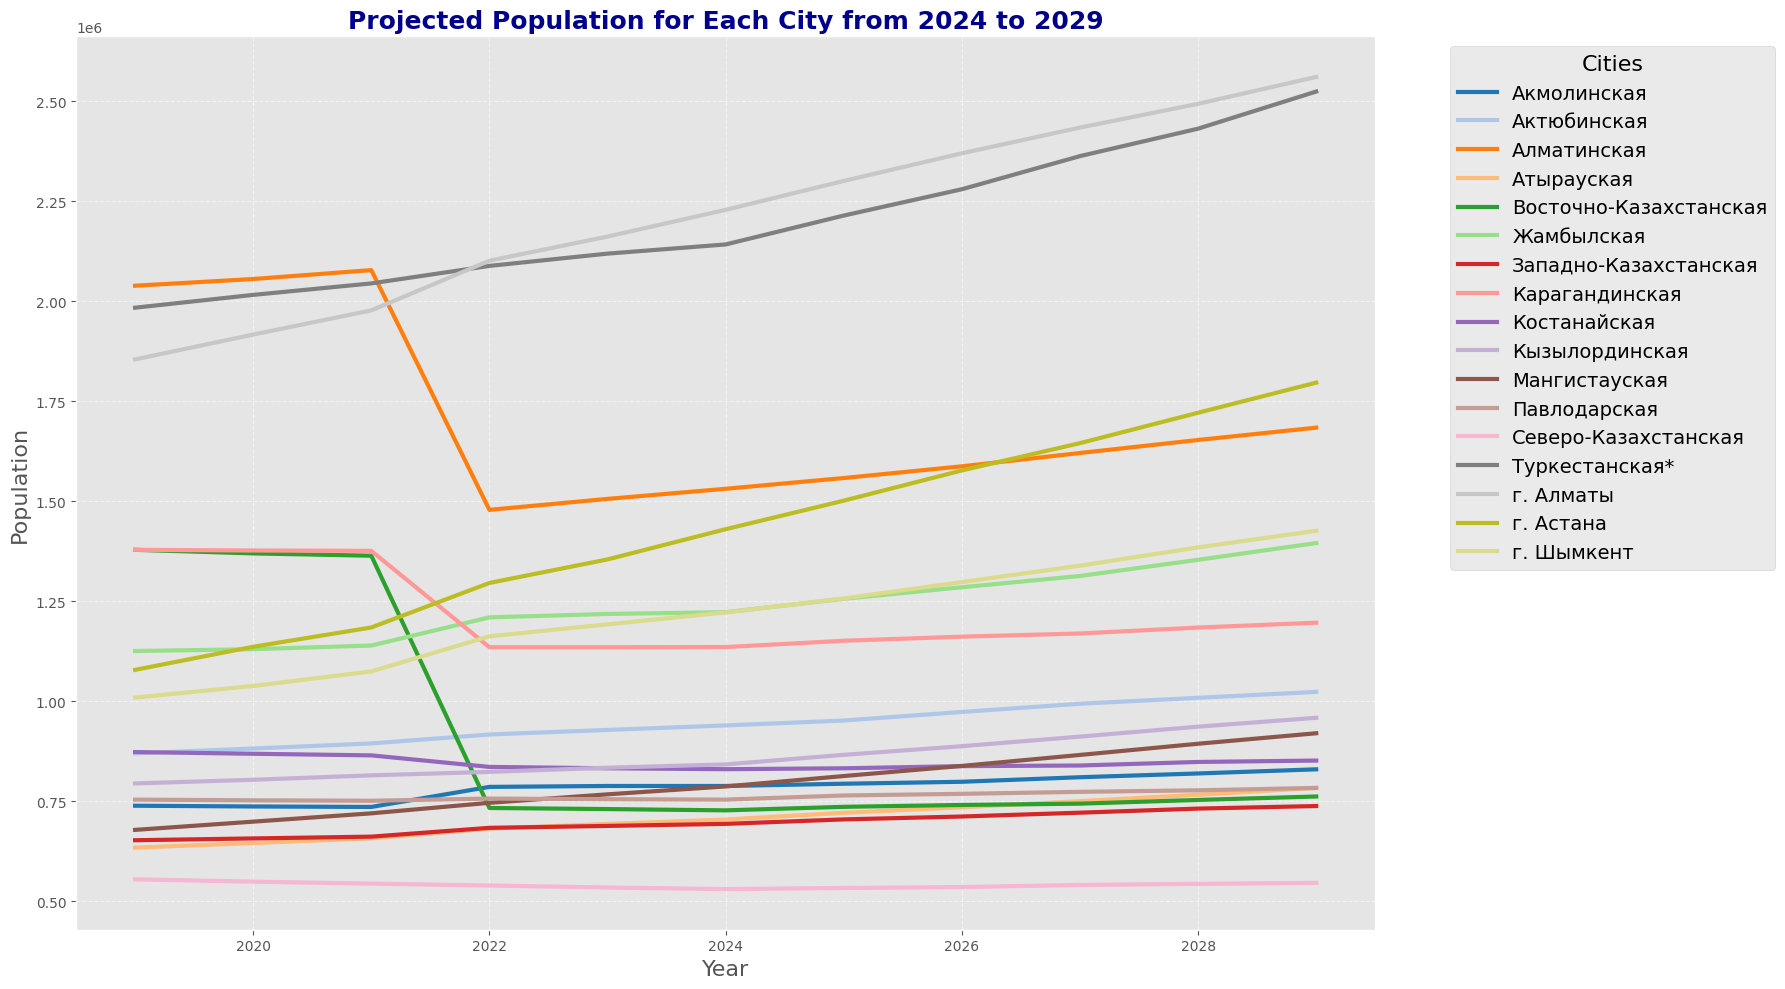

In [ ]:
import matplotlib.pyplot as plt

# Set a style for the plot (using 'ggplot' which is widely available)
plt.style.use('ggplot')

# Plot all projections in one graph with customizations
plt.figure(figsize=(18, 10))  # Larger figure size

# Customize color palette
colors = plt.cm.tab20.colors

for index, color in zip(all_population['City'].unique(), colors):
    if(index != 'Республика Казахстан '):
        data = all_population[all_population['City'] == index]
        plt.plot(data.columns[1:], data.iloc[0, 1:], label=index, color=color, linewidth=3)  # Thicker lines

# Labeling the plot
plt.title("Projected Population for Each City from 2024 to 2029", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Population", fontsize=16)

# Improved legend with a title
plt.legend(title="Cities", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

# Customize grid with lighter opacity
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()


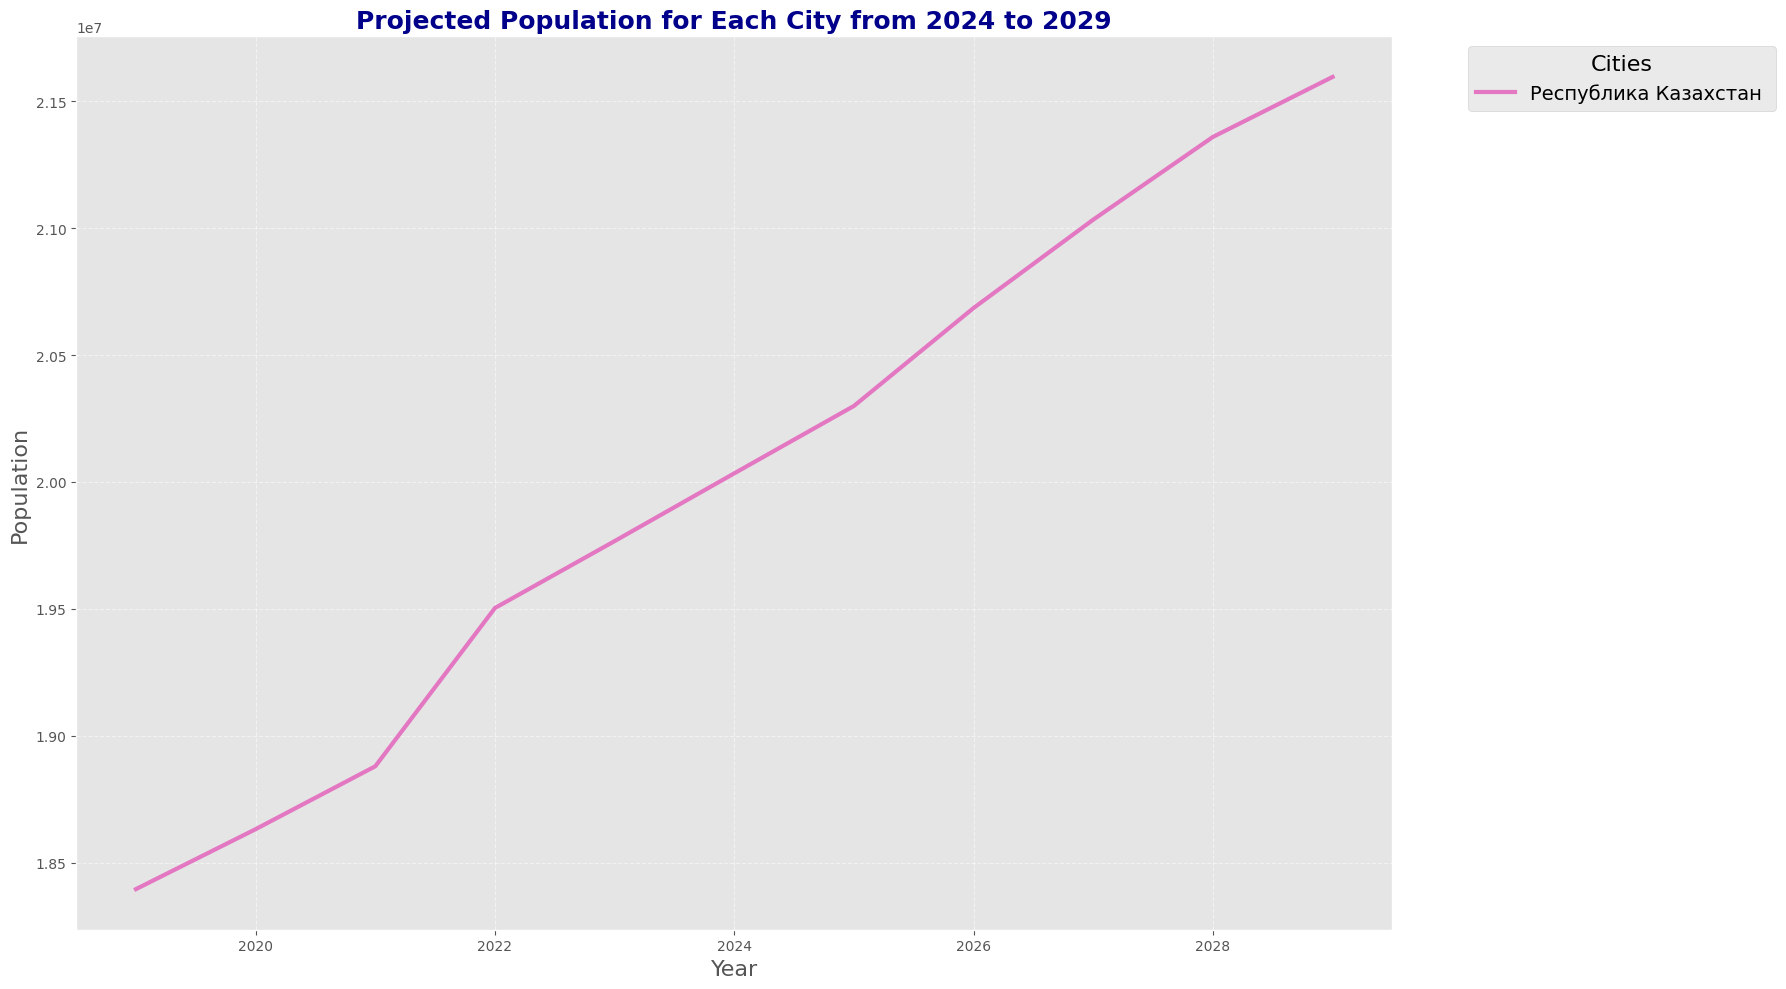

In [ ]:
import matplotlib.pyplot as plt

# Set a style for the plot (using 'ggplot' which is widely available)
plt.style.use('ggplot')

# Plot all projections in one graph with customizations
plt.figure(figsize=(18, 10))  # Larger figure size

# Customize color palette
colors = plt.cm.tab20.colors

for index, color in zip(all_population['City'].unique(), colors):
    if(index == 'Республика Казахстан '):
        data = all_population[all_population['City'] == index]
        plt.plot(data.columns[1:], data.iloc[0, 1:], label=index, color=color, linewidth=3)  # Thicker lines

# Labeling the plot
plt.title("Projected Population for Each City from 2024 to 2029", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Population", fontsize=16)

# Improved legend with a title
plt.legend(title="Cities", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize=16)

# Customize grid with lighter opacity
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout to avoid clipping
plt.tight_layout()

# Show plot
plt.show()
